### MRI3T27T Data - Unprocessed

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of radio.data.datamodules.mri_3t27t failed: Traceback (most recent call last):
  File "/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 329, in update_class
    if update_generic(old_obj, new_obj):
  File "/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/home/di

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [53]:
import radio as rio
from radio.data.datautils import get_first_batch
from radio.data.datavisualization import plot_batch_gan

#### Setup Data

In [54]:
# Load pre-stored data from train/test/val folders 
data = rio.data.MRI3T27TDataModule(
    root="/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies",
    study="MRI3T27T",
    subj_dir="unprocessed",
    data_dir="",
    domain_a="3T_MPR",
    domain_b="7T_MPR",
    use_augmentation=False,
    use_preprocessing=True,
    resample=False,
    batch_size=4,
    dims=(368, 480, 384),
)
data.prepare_data()
data.setup()

/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:95: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:114: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:133: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:149: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and wi

In [55]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 890 subjects.
Validation: 222 subjects.
Test: 30 subjects.


#### Get a Train and a Test Batch

In [56]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [57]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [58]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Domain A Sample Shape: {train_batch['3T_MPR'][0]['mri']['data'].shape}")
print(f"Domain A Target: {train_batch['3T_MPR'][1]}")
print(f"Domain B Sample Shape: {train_batch['7T_MPR'][0]['mri']['data'].shape}")
print(f"Domain B Target: {train_batch['7T_MPR'][1]}")

Batch keys: dict_keys(['3T_MPR', '7T_MPR'])
Domain A Sample Shape: torch.Size([4, 1, 368, 480, 384])
Domain A Target: tensor([0, 0, 0, 0])
Domain B Sample Shape: torch.Size([4, 1, 368, 480, 384])
Domain B Target: tensor([1, 1, 1, 1])


#### Plot Example Samples from Batches

[2, 1, 0, 3, 4]
Subject: 1


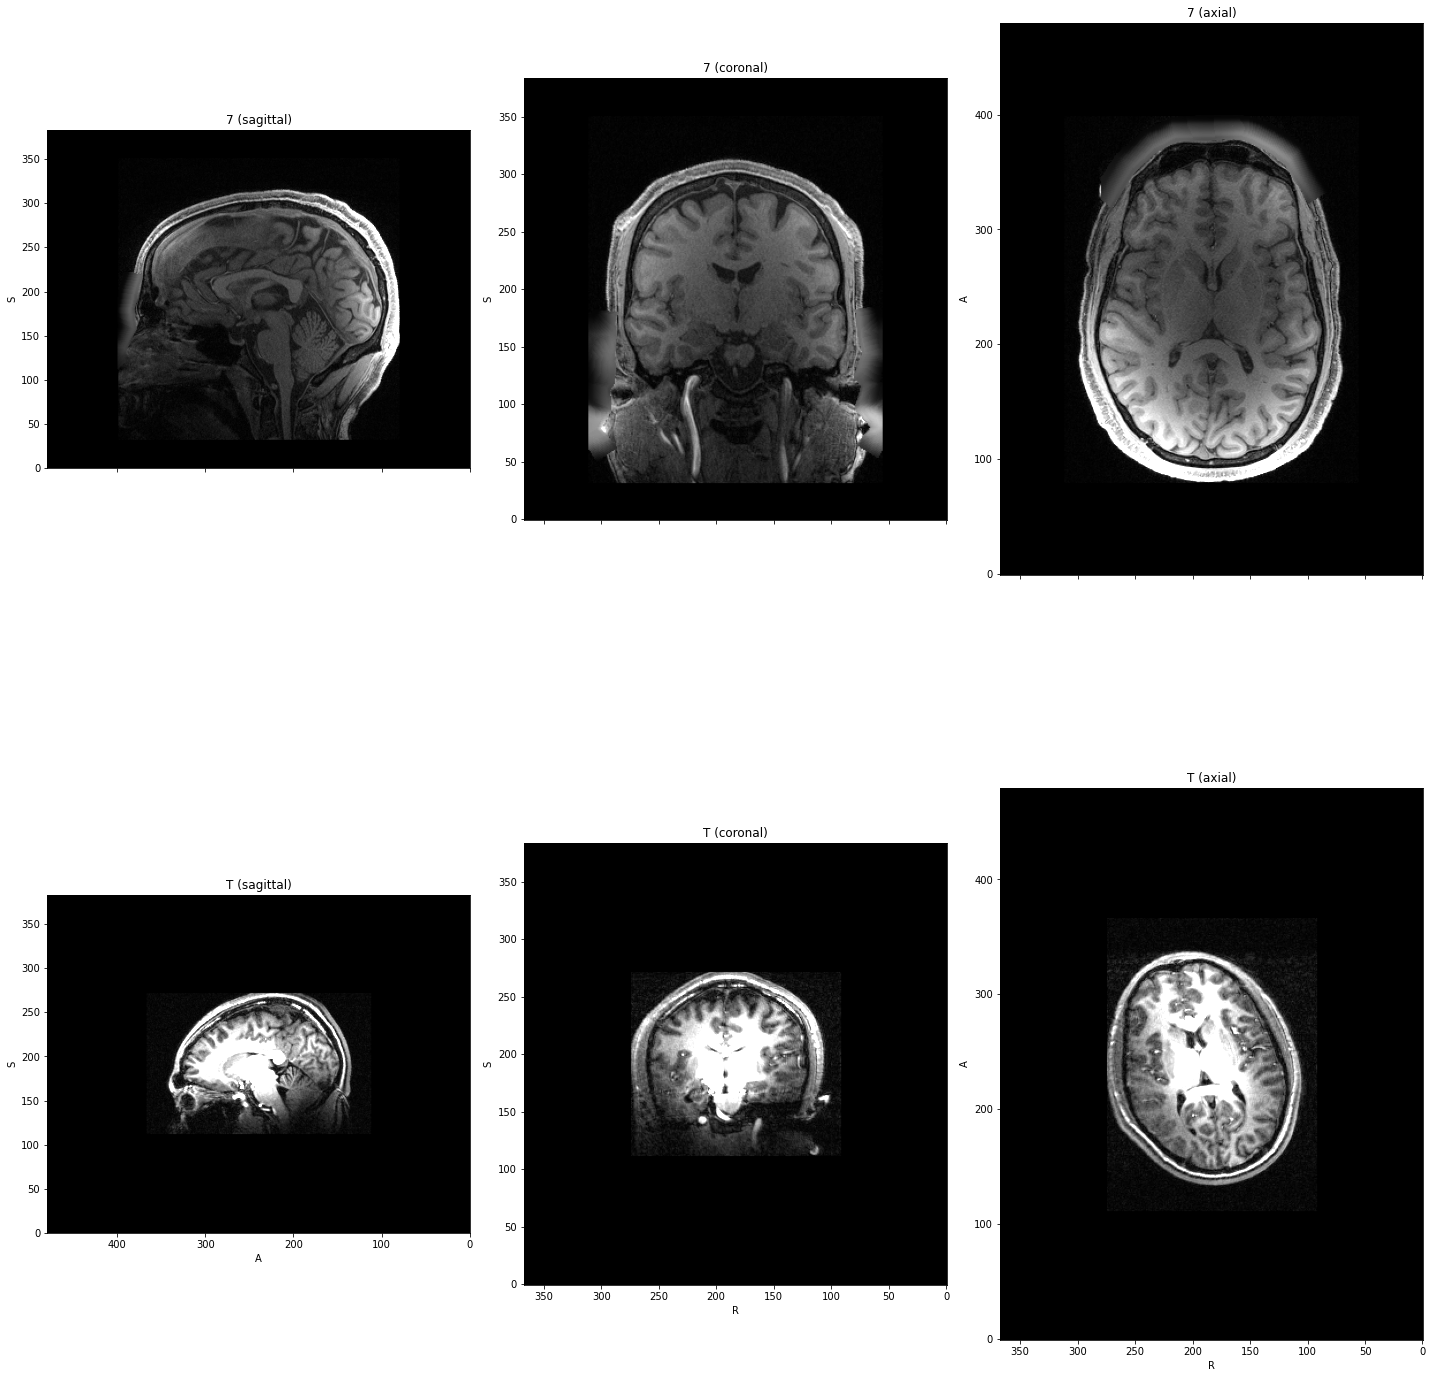



Subject: 2


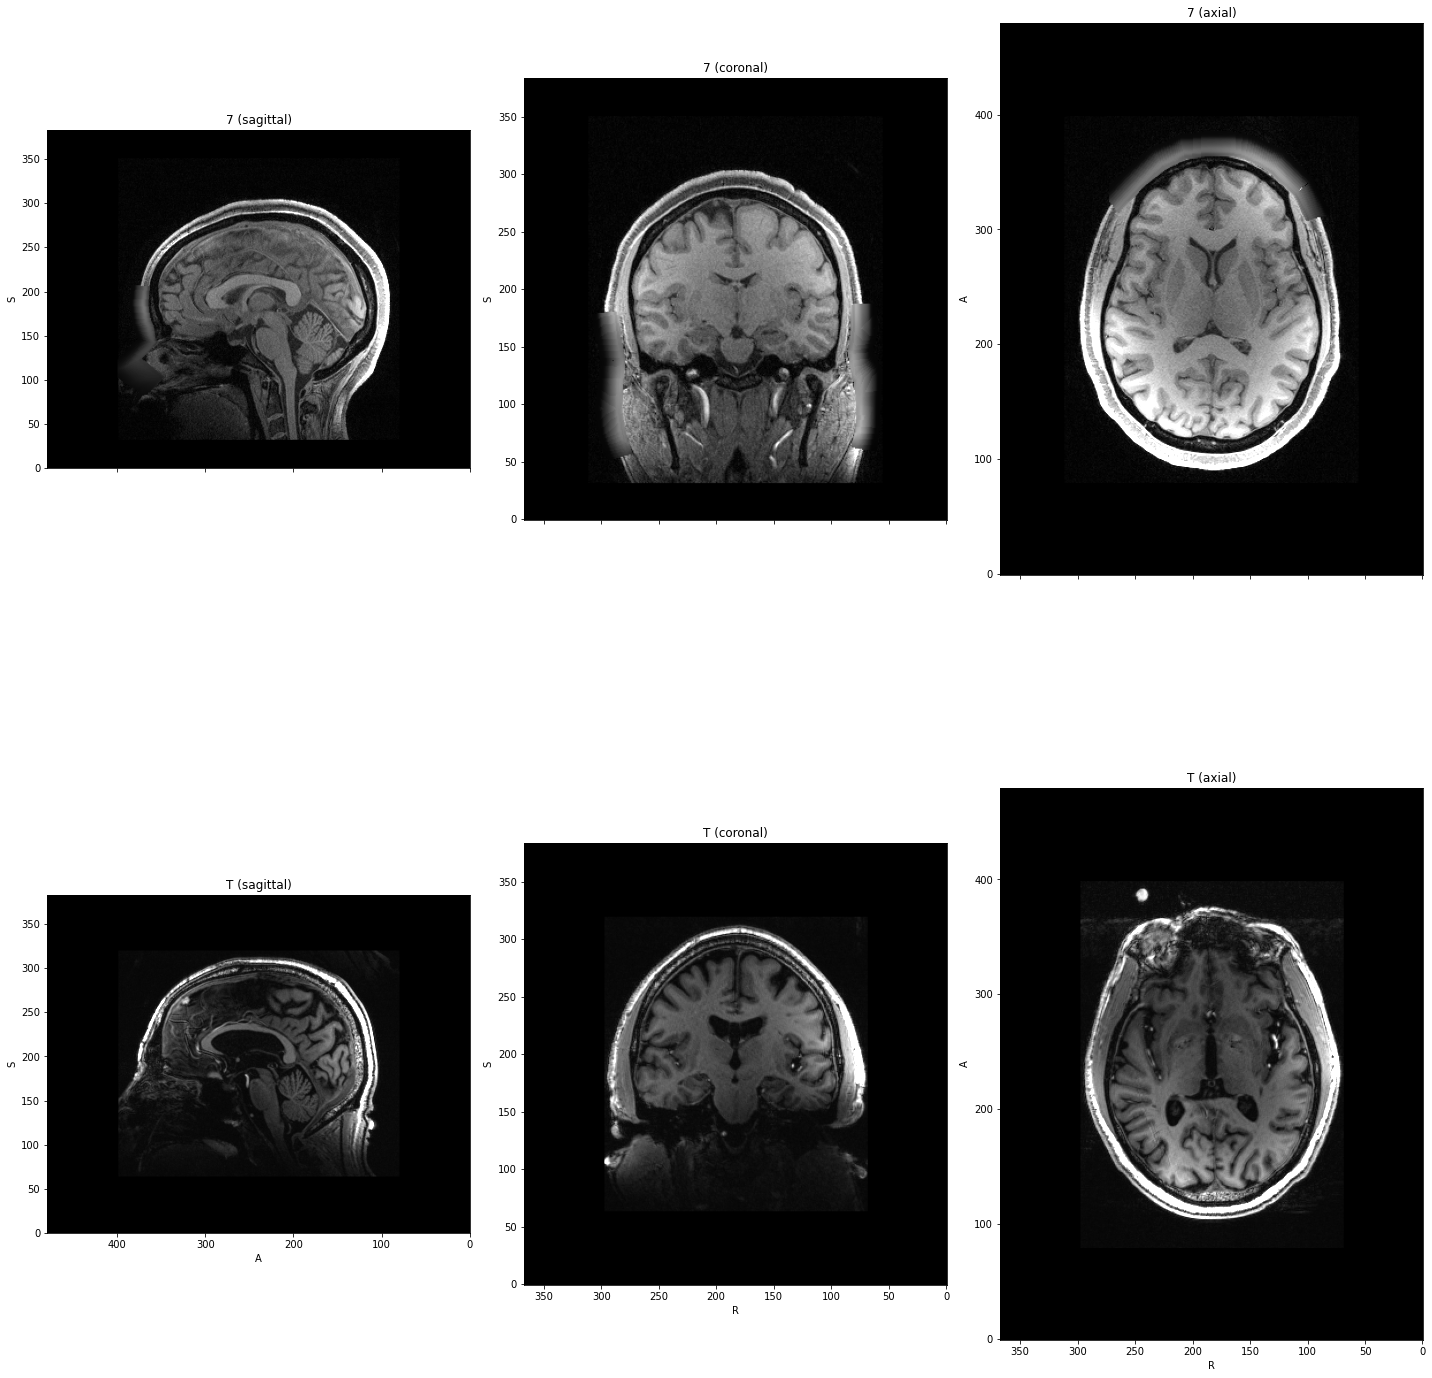



Subject: 3


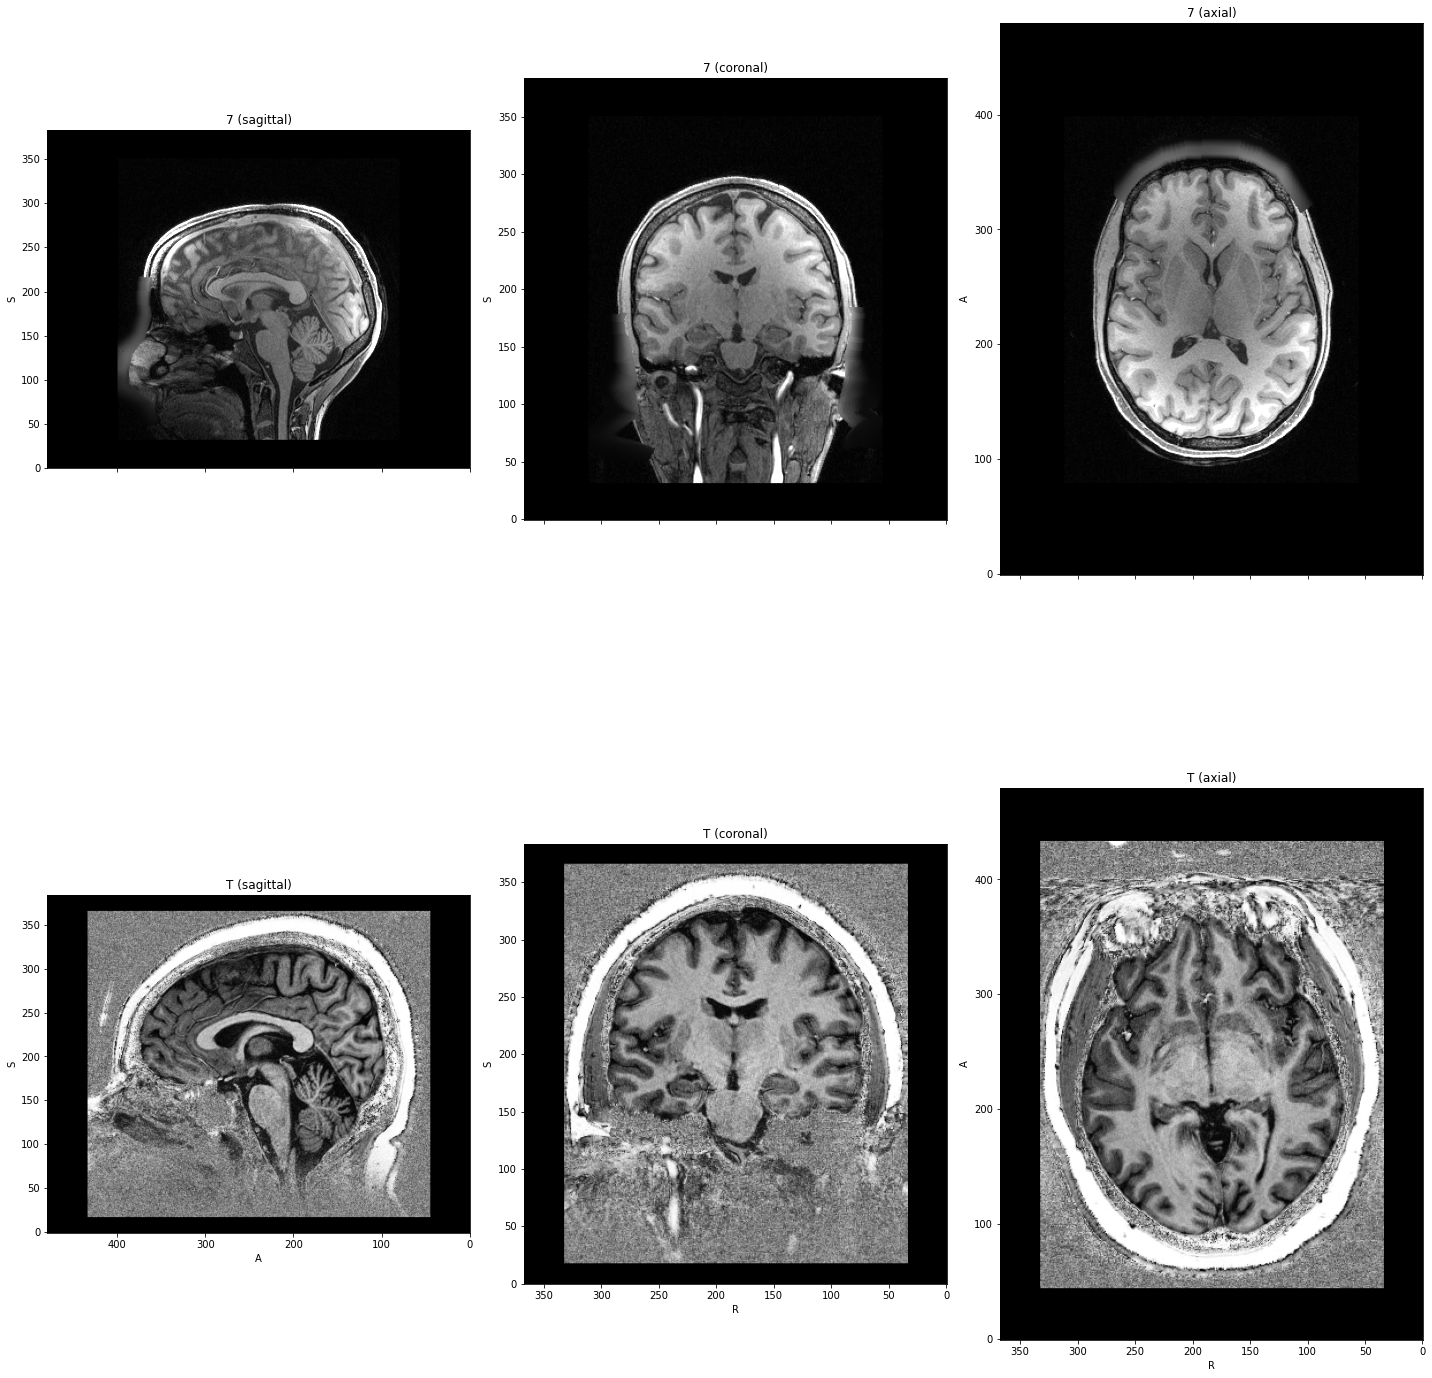



Subject: 4


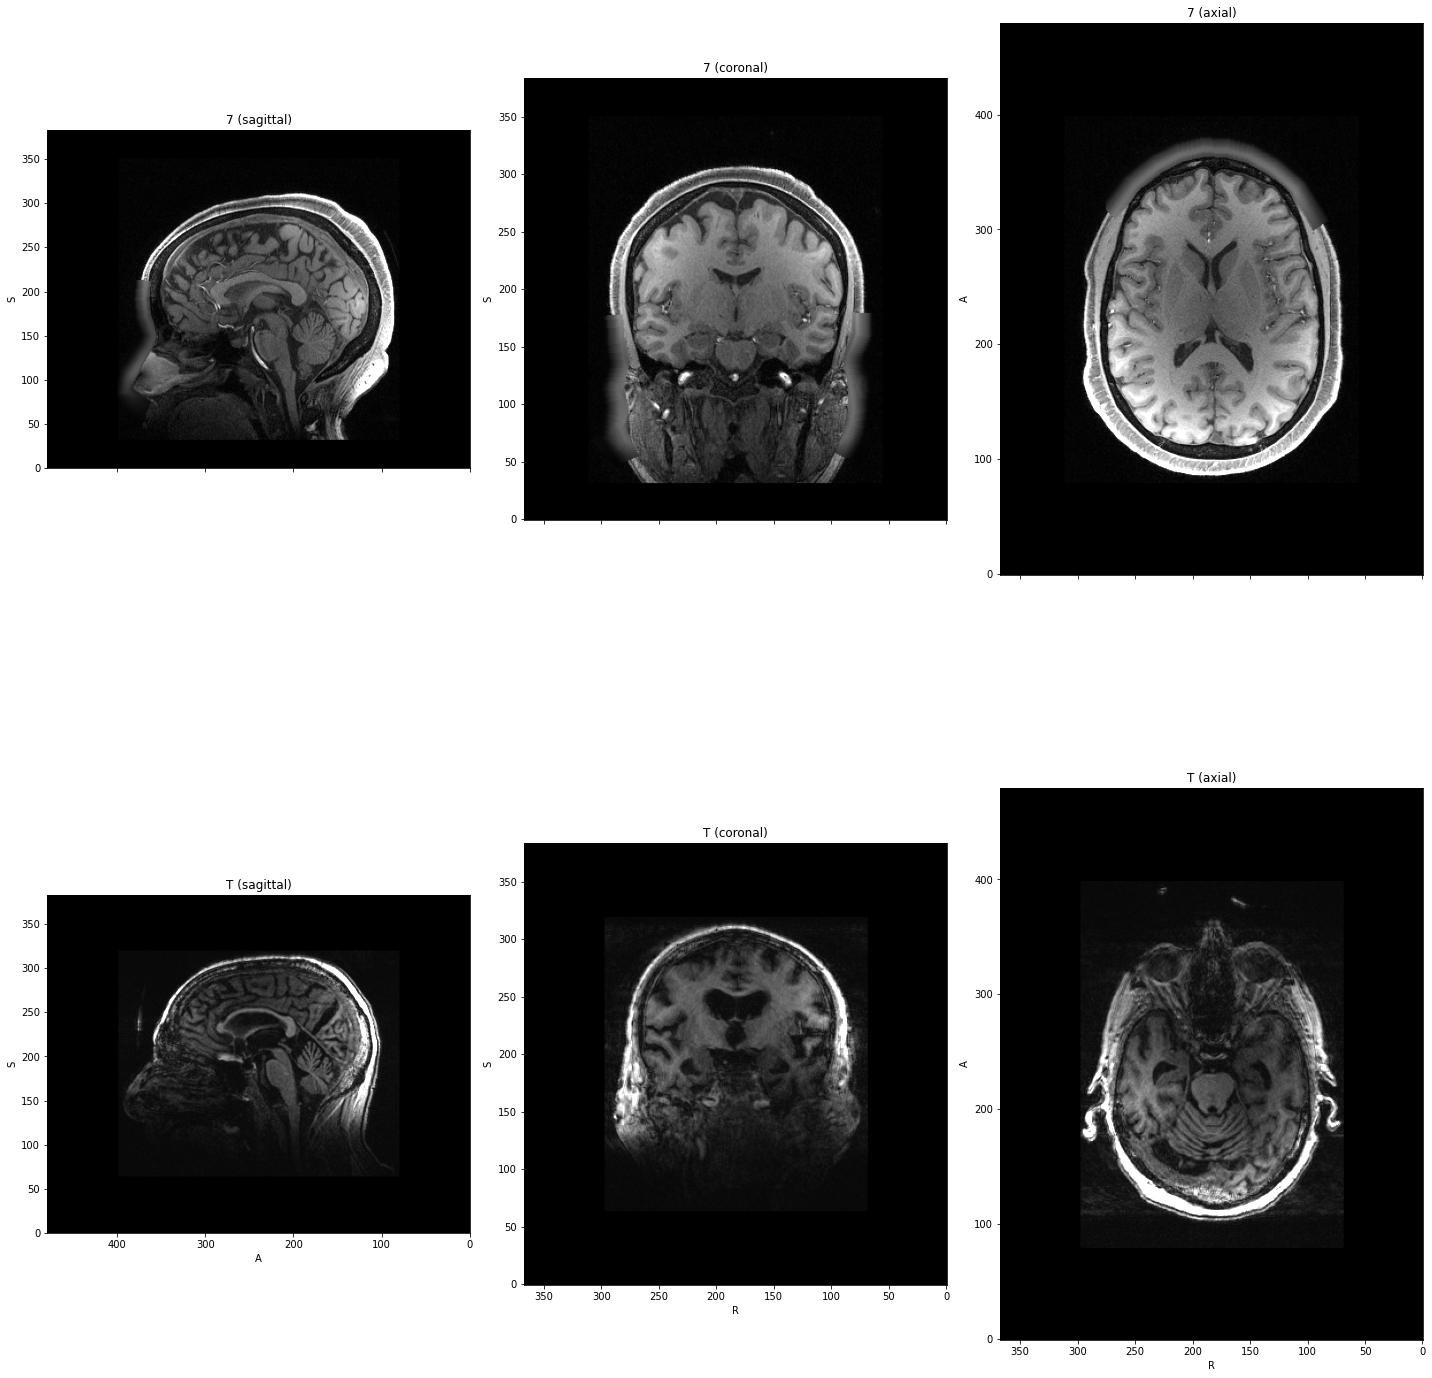

In [59]:
plot_batch_gan(train_batch)